In [1]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct,abs_v
c=299792458
p = pv.Plotter()
srffolder = 'srf/'


10


In [2]:
# 1. define frequnecy and wavelength
freq = 150*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


1.9986163866666666 3.1437675329275225


In [32]:
# 2. define coordinate systems
dx = 180 # mm
eff_focal_length = 569.56 #mm
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(803.9719951339465-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L2 = coordinate.coord_sys([0,0,-(227.64396727901004-4.696706712699847*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L3 = coordinate.coord_sys([0,0,-(71.77590111674095-2.96556*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed_offset = coordinate.coord_sys([dx,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_feed_rotation = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_offset)
coord_feed = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_rotation)



coord_sky_ref = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
#coord_sky = coordinate.coord_sys([0,0,0],[0,-dx/569.56,0],axes = 'xyz',ref_coord = coord_sky_ref)
coord_sky = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_sky_ref)


In [4]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-2.1714724,
                        10.1161095,
                        k,
                        coord_feed,
                        polarization = 'x')


26584903304305.848


In [5]:
# 4. Lenses and aperture 
outputfolder = 'output2_AR/150GHz/x'+str(dx)+'_offaxis/'
AR_FILE = 'AR_LIB/Ideal_AR.h5'
groupname = 'ideal_AR'
L1 = lenspy.simple_Lens(3.36,
                        4.34991*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens1_f2.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)
L2 = lenspy.simple_Lens(3.36,
                        4.69671*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens2_f2.rsf', 
                        srffolder + 'lens2_f1.rsf',
                        p,
                        coord_L2,
                        name = 'L2',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)

L3 = lenspy.simple_Lens(3.36,
                        2.96556*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens3_f2.rsf', 
                        srffolder + 'lens3_f1.rsf',
                        p,
                        coord_L3,
                        name = 'L3',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [66]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         -np.arctan(dx/569.56),
                                         0,
                                         10/180*np.pi,
                                         10/180*np.pi,
                                         501,501,
                                         Type = 'uv',#'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [7]:
N1 =[760,1880]
N2 = [480,2160]
L3.PO_analysis([1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_'+str(dx)+'mm.h5',
            Method ='POPO')


Gain of the Guassian feedhonr!
-6.632431697966238 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.002169687476559972 1.826566415625585e-17
output poynting:
0.002169656863339035
tiemusage: 0.1072549819946289
Batch size: 18
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 36775/36775 [19:05<00:00, 32.09it/s]


1147.3470630645752
check the sin(theta_i)
(array([     0,      1,      2, ..., 661946, 661948, 661950]),)
**************
##############
check energy conservation!
check the poynting vector
0.001902805705291374 3.516133414195721e-20
output poynting:
0.007252064687198995


In [12]:
N1 =[740,2320]
N2 = [195,390]
L2.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L3,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_'+str(dx)+'mm.h5',
            Method ='POPO')


output2_AR/150GHz/x180_offaxis/L3_po_cur_180mm.h5
Here
tiemusage: 0.08113408088684082
Batch size: 20
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 54789/54789 [22:49<00:00, 40.02it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.0003342541807829908 2.795441788857805e-12
output poynting:
0.0003740654692075471
tiemusage: 0.12798857688903809
Batch size: 15
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 3276/3276 [01:41<00:00, 32.19it/s]


103.21917629241943
check the sin(theta_i)
(array([    0,     1,     2, ..., 49143, 49144, 49145]),)
**************
##############
check energy conservation!
check the poynting vector
0.00033747845815619446 5.781676391048848e-11
output poynting:
0.0005304800604974655


In [13]:
N1 =[680,2320]
N2 = [600,200]
L1.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L2,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_'+str(dx)+'mm.h5',
            Method ='POPO')


output2_AR/150GHz/x180_offaxis/L2_po_cur_180mm.h5
Here
tiemusage: 0.004573345184326172
Batch size: 348
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 2893/2893 [01:24<00:00, 34.16it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
2.3376745711514275e-05 1.8835027535099164e-09
output poynting:
2.9344713381025194e-05
tiemusage: 0.12099051475524902
Batch size: 17
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 4622/4622 [02:28<00:00, 31.07it/s]


150.22819542884827
check the sin(theta_i)
(array([45502, 45604, 45864, ..., 78584, 78585, 78586]),)
**************
##############
check energy conservation!
check the poynting vector
2.0736163980319167e-05 5.007088906526748e-09
output poynting:
0.00029529763179113826


In [67]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


251001


In [68]:
#L1.surf_cur_file = 'output/L1_po_cur_0mm_x.h5'

L1.source(center_grd,
          k,
          far_near = 'far')


output2_AR/150GHz/x180_offaxis/L1_po_cur_180mm.h5
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
*(**)
Batch size: 727


100%|██████████| 345/345 [00:13<00:00, 25.68it/s]


In [69]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)


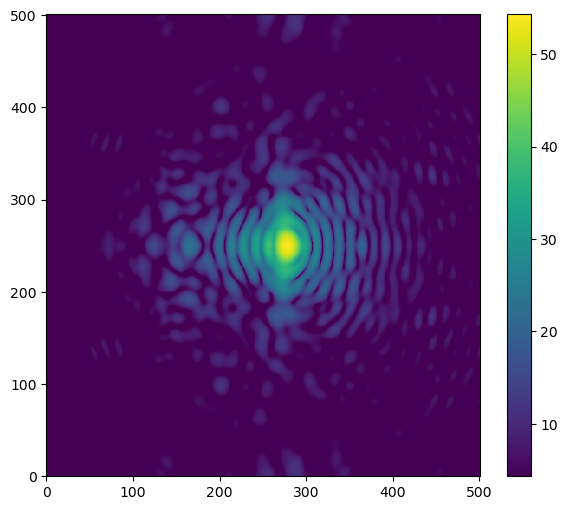

In [70]:
fig = plt.figure(figsize = (7,6))
vmax= np.log10(np.abs(E_co.reshape(501,-1)).max())*20
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


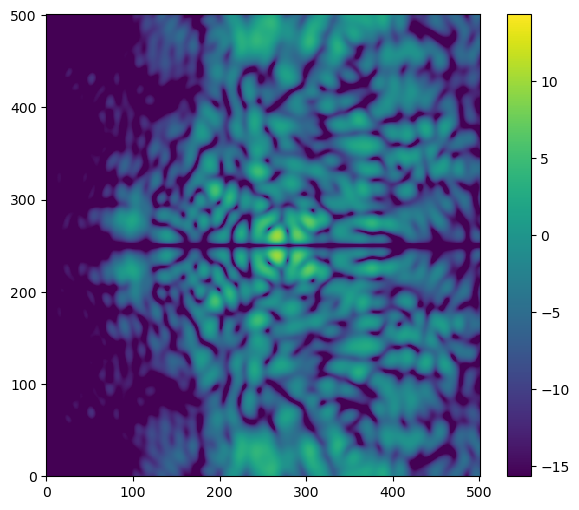

In [71]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [ ]:
import h5py as h5
def readh5(fname):
    name = fname.split('.h5')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [ ]:
Az, El, grasp_co,grasp_cx = readh5('../Data/output2/150GHz/150GHz_test/_H5/_x50_y0GHz.h5')


In [ ]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [ ]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/np.abs(grasp_co.reshape(501,-1)[250,:]).max()),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/np.abs(E_co.reshape(501,-1)[250,:]).max()),'-')


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [ ]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]
err = H_co-G_co


In [ ]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


In [ ]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_co-G_co.T
err2 = H_co-H_co.T


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(Az,np.log10(np.abs(E_co.reshape(501,-1)[250,:]))*20,'-')


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-50,10])
#plt.xlim(-1,1)


In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-50,10])
plt.xlim(-1,1)


In [ ]:
L_lensFp_3   = 7.177590111674096
L_lens3_2    = 15.586806616226909
L_lens2_1    = 57.632802785493645
L_lens1_Lyot = 1.162050628144469
L_Ly_vw      = 22.7114

L_lens1_ref = L_lensFp_3 + L_lens3_2 + L_lens2_1
L_lens2_ref = L_lensFp_3 + L_lens3_2
L_lens3_ref = L_lensFp_3 
L_Ly_ref = L_lens1_ref + L_lens1_Lyot
L_vw_ref = L_Ly_ref + L_Ly_vw


In [ ]:
print(L_lens1_ref*10)
print(L_lens2_ref*10)
print(L_lens3_ref*10)


In [ ]:
Az.size
